# BDA Challenge: Erste Analyse

## Bibliotheken laden

In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import json as json
from pandas.io.json import json_normalize

## Analyse eines einzelnen Containers

* Zunächst die Datenstruktur anhand eines Containers untersuchen
* Eine Datei enthält alle Daten die zu einem Container vorhanden sind (insgesammt 77 Container)

In [21]:
srcDir = '/Users/jloy/OneDrive/Desktop/Unterlagen Johannes/Uni/Master/01_Semester I/Business Data Analytics - Applications and Tools/Raw Data/'
inputString = open(srcDir +'70b3d500700016dA.txt').read()
jsonData = json.loads(inputString)
df = pd.read_json(inputString, lines=True)
df

,0,1
0,200,"[{'id': '4110576', 'deveui': '70B3D500700016DA..."


In [22]:
df_garbage = pd.DataFrame(df[1][0])
df_garbage

,id,deveui,unix_time,client_id,created_at,decoded_data
0,4110576,70B3D500700016DA,1620498360377,FES Receiver,2021-05-08 20:26:00.596017,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
1,4110093,70B3D500700016DA,1620494765501,FES Receiver,2021-05-08 19:26:05.713448,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
2,4109607,70B3D500700016DA,1620491158880,FES Receiver,2021-05-08 18:25:59.323267,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
3,4109118,70B3D500700016DA,1620487559091,FES Receiver,2021-05-08 17:25:59.523137,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
4,4108627,70B3D500700016DA,1620483959154,FES Receiver,2021-05-08 16:25:59.577446,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
...,...,...,...,...,...,...
7301,598784,70B3D500700016DA,1588992719129,hi3,2020-05-09 04:51:59.293896,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
7302,598530,70B3D500700016DA,1588989119318,hi3,2020-05-09 03:51:59.488678,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
7303,598280,70B3D500700016DA,1588985519487,hi3,2020-05-09 02:51:59.658736,"{'sensor_data': {'Status': ['SS', 'Standalone'..."
7304,598036,70B3D500700016DA,1588981919681,hi3,2020-05-09 01:51:59.856614,"{'sensor_data': {'Status': ['SS', 'Standalone'..."


In [23]:
print(df_garbage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            7306 non-null   object
 1   deveui        7306 non-null   object
 2   unix_time     7306 non-null   object
 3   client_id     7306 non-null   object
 4   created_at    7306 non-null   object
 5   decoded_data  7306 non-null   object
dtypes: object(6)
memory usage: 342.6+ KB
None


* Die Datei enhält 7306 Datenpunkte/Zeilen: 
    * jeder Datenpunkt repräsentiert eine Sensormessung
* Zu jeder Sensormessung gibt es 6 Spalten:
    * Spalte0 - id: Annahme: Eindeutige ID für Sensormessungen auch über Dokumente hinweg?
    * Spalte1 - deveui: entspricht Dateiname -> ID des Containers
    * Spalte2 - unix_time: Sekunden seit 01.01.1970 00:00 Uhr -> bietet sich für Matching mit Wetterdaten etc an
    * Spalte3 - client_id: Annahme: ID des Sensors bzw Sensortyp
    * Spalte4 - created_at: identisch zu unix_time -> unnötige info -> Spalte kann raus
    * Spalte5 - decoded_data: Daten im JSON-Format -> genauere Betrachtung folgt

* Normalisieren der Spalte6, sodass Dataframe einheitlich untersuchbar
* Folgend genauere Untersuchung der Daten in Spalte6-decoded_data

In [25]:
normalized_df=json_normalize(jsonData[1])
normalized_df

c:\users\jloy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,id,deveui,unix_time,client_id,created_at,decoded_data.sensor_data.Status,decoded_data.sensor_data.Sensor ID,decoded_data.sensor_data.Events,decoded_data.sensor_data.Height 1,decoded_data.sensor_data.Height 2,...,decoded_data.gws_data.ts,decoded_data.gws_data.fcnt,decoded_data.gws_data.port,decoded_data.gws_data.freq,decoded_data.gws_data.toa,decoded_data.gws_data.dr,decoded_data.gws_data.ack,decoded_data.gws_data.gws,decoded_data.gws_data.bat,decoded_data.gws_data.data
0,4110576,70B3D500700016DA,1620498360377,FES Receiver,2021-05-08 20:26:00.596017,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,...,1620498360377,4097,2,867500000,123,SF8 BW125 4/5,False,"[{'rssi': -105, 'snr': 4.5, 'ts': 162049836037...",254,ffff22b8da1600700138383838700e01c1
1,4110093,70B3D500700016DA,1620494765501,FES Receiver,2021-05-08 19:26:05.713448,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,112 cm,112 cm,...,1620494765501,4096,2,868100000,71,SF7 BW125 4/5,False,"[{'rssi': -110, 'snr': 1, 'ts': 1620494765501,...",254,ffff22b8da1600700138383838701101c0
2,4109607,70B3D500700016DA,1620491158880,FES Receiver,2021-05-08 18:25:59.323267,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,108 cm,108 cm,...,1620491158880,4095,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -107, 'snr': 7.5, 'ts': 162049115888...",254,ffff22b8da1600700136363636710f00bf
3,4109118,70B3D500700016DA,1620487559091,FES Receiver,2021-05-08 17:25:59.523137,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,126 cm,126 cm,...,1620487559091,4094,2,867500000,71,SF7 BW125 4/5,False,"[{'rssi': -102, 'snr': 5, 'ts': 1620487559091,...",254,ffff22b8da160070013f3f3f3f711301be
4,4108627,70B3D500700016DA,1620483959154,FES Receiver,2021-05-08 16:25:59.577446,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,118 cm,118 cm,...,1620483959154,4093,2,867900000,71,SF7 BW125 4/5,False,"[{'rssi': -113, 'snr': 5.2, 'ts': 162048395916...",254,ffff22b8da160070013b3b3b3b711400bd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7301,598784,70B3D500700016DA,1588992719129,hi3,2020-05-09 04:51:59.293896,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,...,1588992719129,2277,2,868300000,71,SF7 BW125 4/5,False,"[{'rssi': -98, 'snr': 6.2, 'ts': 1588992719129...",254,ffff22b8da16007001040404046b0c0292
7302,598530,70B3D500700016DA,1588989119318,hi3,2020-05-09 03:51:59.488678,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,...,1588989119318,2276,2,867300000,71,SF7 BW125 4/5,False,"[{'rssi': -101, 'snr': 9.2, 'ts': 158898911931...",254,ffff22b8da16007001040404046b0d0191
7303,598280,70B3D500700016DA,1588985519487,hi3,2020-05-09 02:51:59.658736,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,...,1588985519487,2275,2,867100000,71,SF7 BW125 4/5,False,"[{'rssi': -99, 'snr': 7.8, 'ts': 1588985519487...",254,ffff22b8da16007001040404046b0b0190
7304,598036,70B3D500700016DA,1588981919681,hi3,2020-05-09 01:51:59.856614,"[SS, Standalone, version_184]",700016da,SENS_EVENT_MEASURE,8 cm,8 cm,...,1588981919681,2274,2,867700000,71,SF7 BW125 4/5,False,"[{'rssi': -99, 'snr': 8.5, 'ts': 1588981919681...",254,ffff22b8da16007001040404046b0b018f


In [65]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7306 entries, 0 to 7305
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    7306 non-null   object
 1   deveui                                7306 non-null   object
 2   unix_time                             7306 non-null   object
 3   client_id                             7306 non-null   object
 4   created_at                            7306 non-null   object
 5   decoded_data.sensor_data.Status       7306 non-null   object
 6   decoded_data.sensor_data.Sensor ID    7306 non-null   object
 7   decoded_data.sensor_data.Events       7306 non-null   object
 8   decoded_data.sensor_data.Height 1     7306 non-null   object
 9   decoded_data.sensor_data.Height 2     7306 non-null   object
 10  decoded_data.sensor_data.Height 3     7306 non-null   object
 11  decoded_data.sensor_data.Heigh

* Jeder Datenpunkt hat nun 30 Spalten
    * Spalten 0-4 schon betrachtet
    * Spalte5 - Status: ??irrelevant??
    * Spalte6 - SensorID: in Spalte1enthalten ??irrelevant??
    * Spalte7 - Events: ??irrelevant??
    * Spalte8 - Height1: !!sehr relevant!!
    * Spalte9 - Height2: Vermutung: identisch zu Height1 ??irrelevant??
    * Spalte10 - Height3: Vermutung: identisch zu Height1 ??irrelevant??
    * Spalte11 - Height4: Vermutung: identisch zu Height1 ??irrelevant??
    * Spalte12 - Voltage: war für Spannung? am Sensor? !!relevant!!
    * Spalte13 - Temperature: Außentemperatur? Im Container? !!relevant!!
    * Spalte14 - Tilt: Einheit? Neigung des COntainers? Lässt vllt auf Entleerung schließen?
    * Spalte15 - Tx Event: 
    * Spalte16 - Messagetype: 
    * Spalte17 - cmd: 
    * Spalte18 - seqno: 
    * Spalte19 - EUI: 
    * Spalte20 - ts: 
    * Spalte21 - fcnt: 
    * Spalte22 - port: 
    * Spalte23 - freq: 
    * Spalte24 - toa: 
    * Spalte25 - dr: 
    * Spalte26 - ack: 
    * Spalte27 - gws: 
    * Spalte28 - bat: 
    * Spalte29 - data: 
    
* Haupterkenntnisse
    * Spalte4(created_at) kann entfallen, da identisch zu Spalte2(unix_time)
    * wo ist die Position des Containers erfasst?????

Folgend Visualisierung der Werte in den einzelnen Spalten

## Analyse durch Plotten einzelner Spalten

In [67]:
print("The dataset has", len(normalized_df['id'].unique()), "distinct Sensor ID's.")

The dataset has 7306 distinct Sensor ID's.


Spalte0 - id: ist in Dokument eindeutig (vermutlich auch über Dokumente hinweg)

In [69]:
print("The dataset has", len(normalized_df['deveui'].unique()), "distinct Container ID's.")

The dataset has 1 distinct Sensor ID's.


Spalte1 - deveui: entspricht Dateiname -> ID des Containers (im gesamten Dokument gleich)

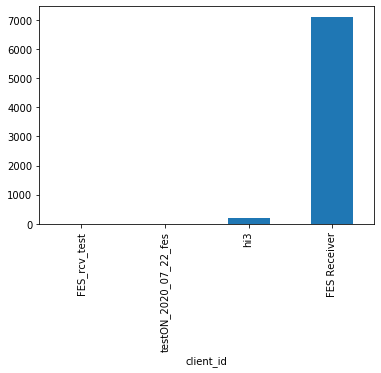

In [64]:
df_count = normalized_df.groupby(['client_id']).size()
df_count = df_count.sort_values(ascending=True)
ax = df_count.plot.bar()

Spalte3 - client_id: Annahme: ID des Sensors bzw Sensortyp -> hauptsächlich FFS Receiver

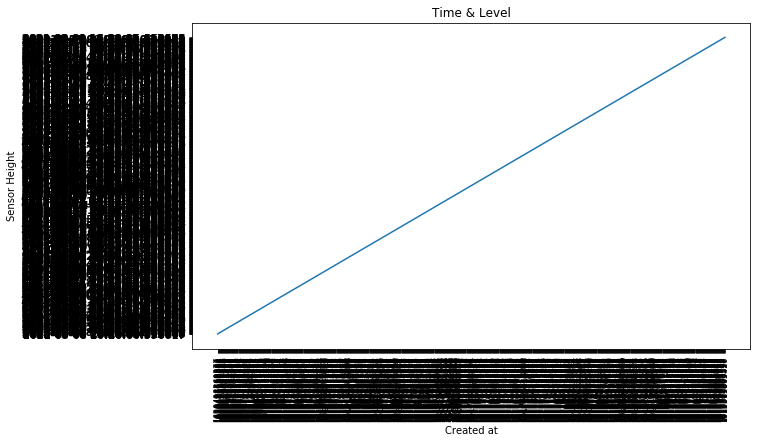

In [70]:
#Putting columns of data frame into lists
unix_time = normalized_df['unix_time']
created_at = normalized_df['created_at']

#Choosing Values for Plotting
n = 1000
x = unix_time[0:n]
y = created_at[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Level")
plt.xlabel("Created at")
plt.ylabel("Sensor Height")

plt.show()

Spalte2 - unix_time und Spalte4 - created_at -> linearer Zusammenhang -> identisch -> eine davon genügt

In [82]:
print("The dataset has", len(normalized_df['decoded_data.sensor_data.Sensor ID'].unique()), "distinct Sensor ID's.")

The dataset has 1 distinct Sensor ID's.


Spalte6: ID des Sensors -> Teil von deveui (im gesamten Dokument gleich)

In [83]:
#decoded_data.sensor_data.Events 
print("The dataset has", len(normalized_df['decoded_data.sensor_data.Events'].unique()), "distinct Event.")

The dataset has 1 distinct Event.


Spalte7: Eventtyp=Sensormessung: jeder Datenpunkt ist eine Sensormessung

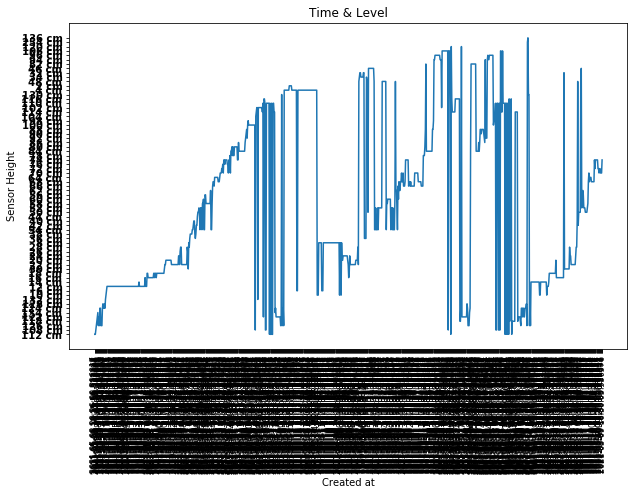

In [59]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
sensor_height_1 = normalized_df['decoded_data.sensor_data.Height 1']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = sensor_height_1[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Level")
plt.xlabel("Created at")
plt.ylabel("Sensor Height")

plt.show()


Spalte8 - Height1: 
* langsame Zunahme des Füllstandes -> relativ zügige Entleerung
* viel Rauschen -> wie können wir die Entleerungsintervalle gut auslesen?
* in cm

In [95]:
sensor_height_1 = normalized_df['decoded_data.sensor_data.Height 1']
sensor_height_2 = normalized_df['decoded_data.sensor_data.Height 2']
sensor_height_3 = normalized_df['decoded_data.sensor_data.Height 3']
sensor_height_4 = normalized_df['decoded_data.sensor_data.Height 4']
print((sensor_height_1 == sensor_height_2).all())
print((sensor_height_1 == sensor_height_3).all())
print((sensor_height_1 == sensor_height_4).all())

True
True
True


Spalte8 - Height1 & Spalte9 - Height2 & Spalte10 - Height3 & Spalte11 - Height4 
* sind alle identisch, eines davon genügt

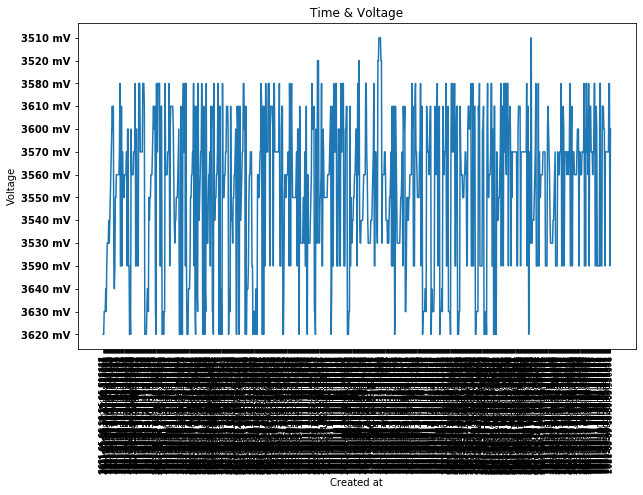

In [96]:
 #Putting columns of data frame into lists
created_at = normalized_df['created_at']
voltage = normalized_df['decoded_data.sensor_data.Voltage']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = voltage[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Voltage")
plt.xlabel("Created at")
plt.ylabel("Voltage")

plt.show()


Spalte12 - Voltage: Was für Spannung? Hat diese Auswirkung? in mV

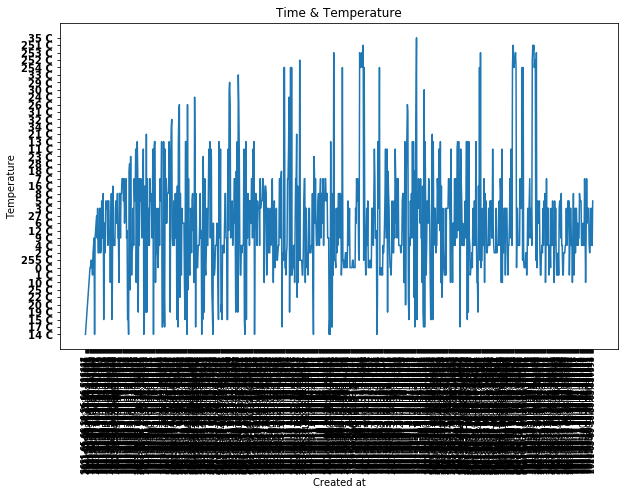

In [97]:
 #Putting columns of data frame into lists
created_at = normalized_df['created_at']
temperature = normalized_df['decoded_data.sensor_data.Temperature']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = temperature[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Temperature")
plt.xlabel("Created at")
plt.ylabel("Temperature")

plt.show()


Spalte13 - Temperature: Außentemperatur oder im Container? Könnte Auswirkung haben... in °C

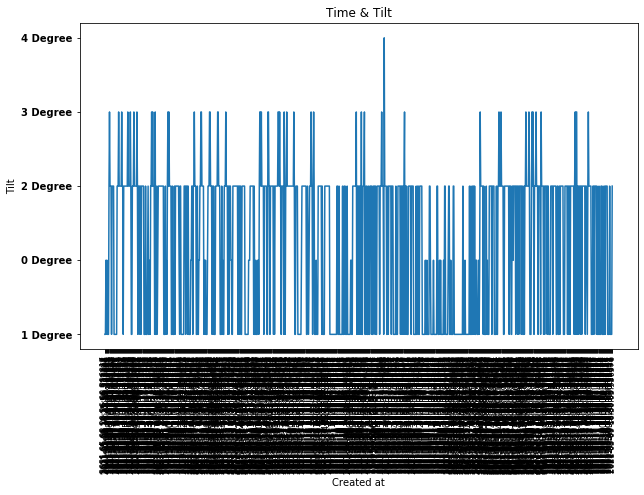

In [98]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
tilt = normalized_df['decoded_data.sensor_data.Tilt']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = tilt[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Tilt")
plt.xlabel("Created at")
plt.ylabel("Tilt")

plt.show()


Spalte14 - Tilt: Neigung des Containers? Lässt vllt auf Entleerung schließen, in °

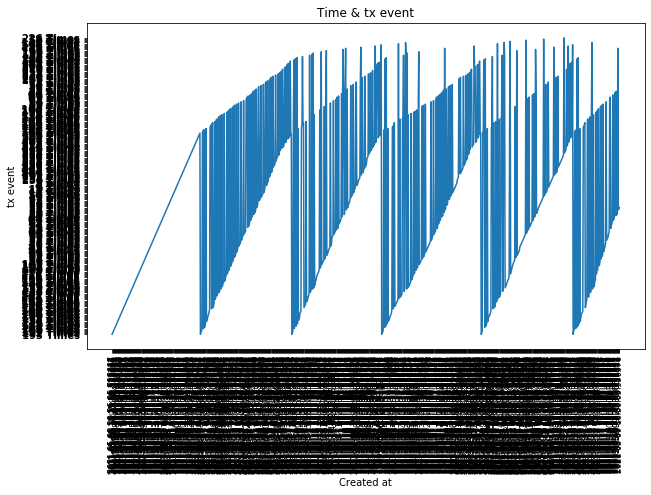

In [103]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
tx_event = normalized_df['decoded_data.sensor_data.Tx Event']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = tx_event[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & tx event")
plt.xlabel("Created at")
plt.ylabel("tx event")

plt.show()


Spalte15 - TX Events: Anzahl von TX Events, aber was ist das?

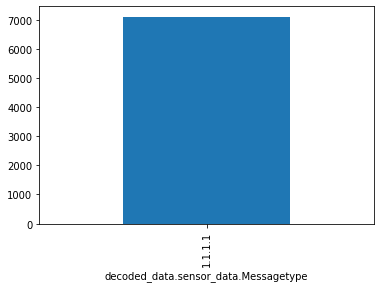

In [108]:
df_count = normalized_df.groupby(['decoded_data.sensor_data.Messagetype']).size()
df_count = df_count.sort_values(ascending=True)
ax = df_count.plot.bar()

Spalte16 - Messagetpye: es gibt einen Messagetype, irrelevant?

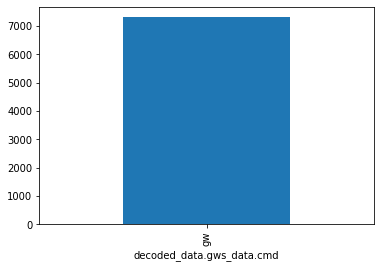

In [110]:
df_count = normalized_df.groupby(['decoded_data.gws_data.cmd']).size()
df_count = df_count.sort_values(ascending=True)
ax = df_count.plot.bar()

Spalte17 - cmd: was ist das? über alle Datenpunkte einheitlich

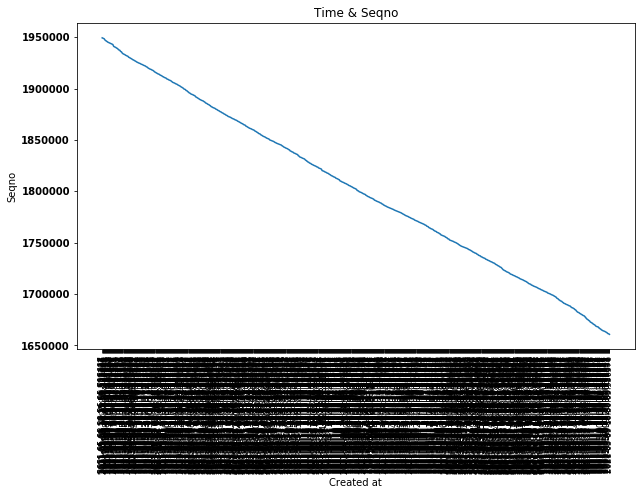

In [114]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
seqno = normalized_df['decoded_data.gws_data.seqno']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = seqno[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Seqno")
plt.xlabel("Created at")
plt.ylabel("Seqno")

plt.show()


Spalte18 - seqno: was ist das? sinkt linear mit der Zeit...

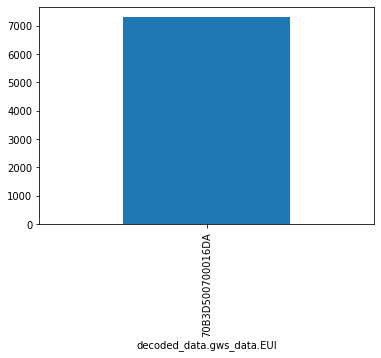

In [115]:
df_count = normalized_df.groupby(['decoded_data.gws_data.EUI']).size()
df_count = df_count.sort_values(ascending=True)
ax = df_count.plot.bar()

Spalte19 - EUI: identisch zu Spalte1-deveui

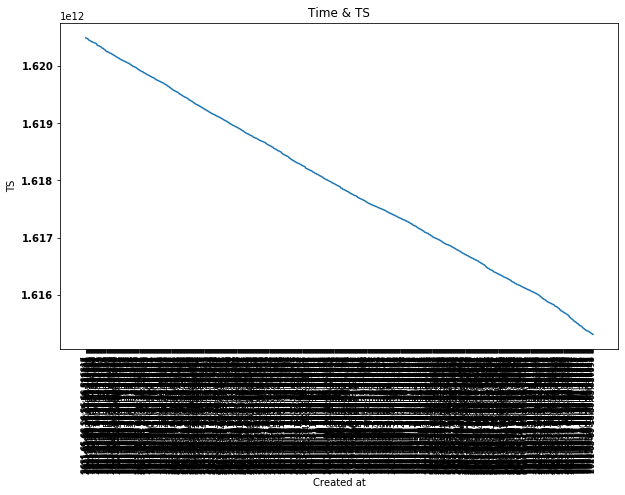

In [118]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
ts = normalized_df['decoded_data.gws_data.ts']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = ts[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & TS")
plt.xlabel("Created at")
plt.ylabel("TS")

plt.show()

Spalte20 - ts: was ist das? sinkt linear mit der Zeit...

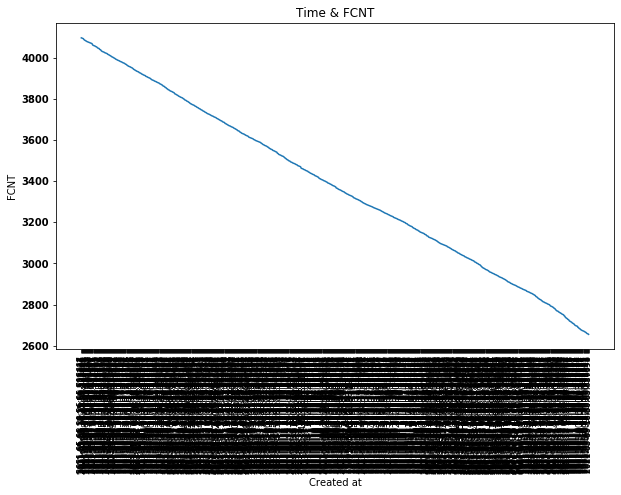

In [120]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
fcnt = normalized_df['decoded_data.gws_data.fcnt']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = fcnt[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & FCNT")
plt.xlabel("Created at")
plt.ylabel("FCNT")

plt.show()

Spalte21 - fcnt: was ist das? sinkt linear mit der Zeit...

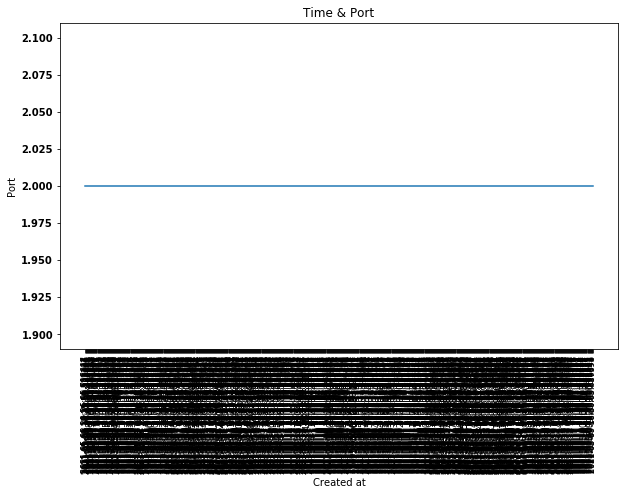

In [122]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
port = normalized_df['decoded_data.gws_data.port']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = port[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Port")
plt.xlabel("Created at")
plt.ylabel("Port")

plt.show()

Spalte22 - port: Was ist das? Konstant 2 über die Zeit

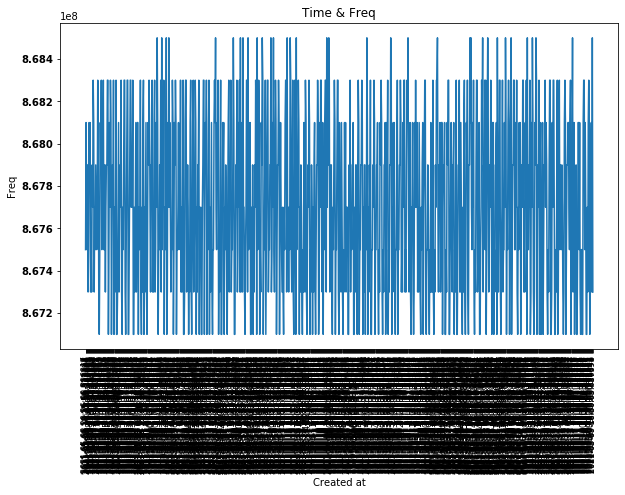

In [125]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
freq = normalized_df['decoded_data.gws_data.freq']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = freq[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Freq")
plt.xlabel("Created at")
plt.ylabel("Freq")

plt.show()

Spalte23 - freq: Was ist das? Was für eine Frequenz, von was?

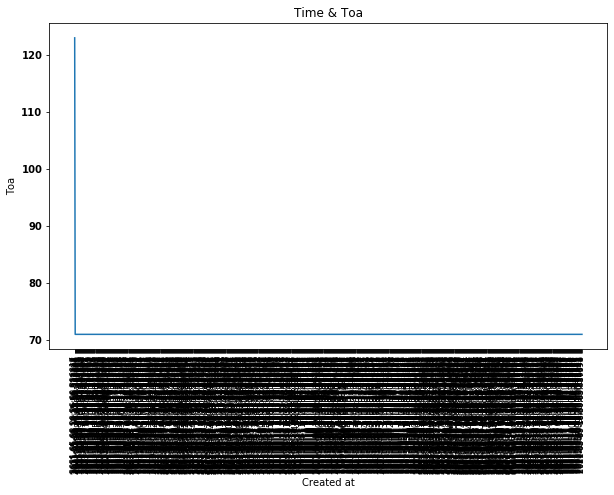

In [126]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
toa = normalized_df['decoded_data.gws_data.toa']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = toa[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Toa")
plt.xlabel("Created at")
plt.ylabel("Toa")

plt.show()

Spalte24 - toa: Was ist das? Komischer Verlauf..

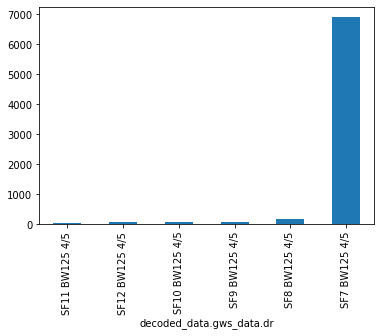

In [128]:
df_count = normalized_df.groupby(['decoded_data.gws_data.dr']).size()
df_count = df_count.sort_values(ascending=True)
ax = df_count.plot.bar()

Spalte25 - dr: Was ist das?

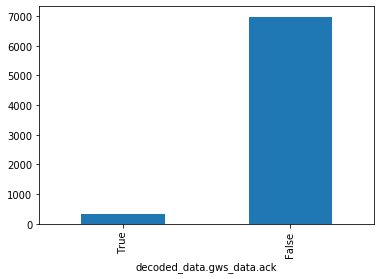

In [129]:
df_count = normalized_df.groupby(['decoded_data.gws_data.ack']).size()
df_count = df_count.sort_values(ascending=True)
ax = df_count.plot.bar()

Spalte26 - ack: Für was steht der Wahrheitswert?

In [137]:
gws_df = normalized_df['decoded_data.gws_data.gws']
gws_df

0       [{'rssi': -105, 'snr': 4.5, 'ts': 162049836037...
1       [{'rssi': -110, 'snr': 1, 'ts': 1620494765501,...
2       [{'rssi': -107, 'snr': 7.5, 'ts': 162049115888...
3       [{'rssi': -102, 'snr': 5, 'ts': 1620487559091,...
4       [{'rssi': -113, 'snr': 5.2, 'ts': 162048395916...
                              ...                        
7301    [{'rssi': -98, 'snr': 6.2, 'ts': 1588992719129...
7302    [{'rssi': -101, 'snr': 9.2, 'ts': 158898911931...
7303    [{'rssi': -99, 'snr': 7.8, 'ts': 1588985519487...
7304    [{'rssi': -99, 'snr': 8.5, 'ts': 1588981919681...
7305    [{'rssi': -103, 'snr': 8, 'ts': 1588978319873,...
Name: decoded_data.gws_data.gws, Length: 7306, dtype: object

Spalte27 - gws: genauere Untersuchung nötig, was für Daten hier enthalten. Vllt Position???

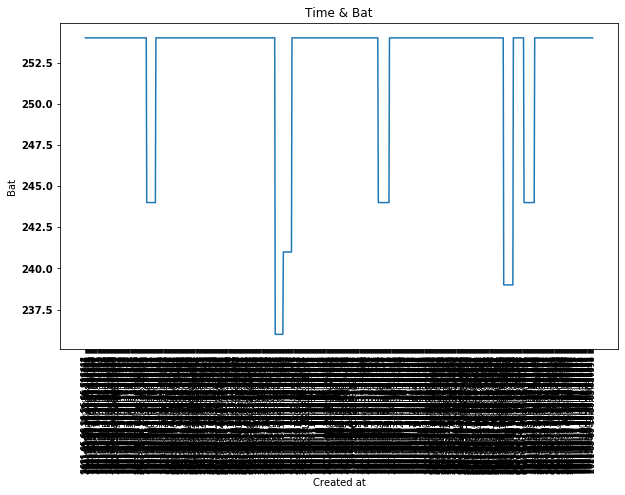

In [138]:
#Putting columns of data frame into lists
created_at = normalized_df['created_at']
bat = normalized_df['decoded_data.gws_data.bat']

#Choosing Values for Plotting
n = 1000
x = created_at[0:n]
y = bat[0:n]

#Plotting
plt.figure(figsize=(10,6))
plt.plot(x, y)

plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=10, fontweight='bold')

plt.title("Time & Bat")
plt.xlabel("Created at")
plt.ylabel("Bat")

plt.show()

Spalte28 - bat: Was ist das?

In [140]:
#decoded_data.sensor_data.Events 
print("The dataset has", len(normalized_df['decoded_data.gws_data.data'].unique()), "distinct data.")

The dataset has 7298 distinct data.


In [ ]:
Spalte29 - 